C:\Users\v\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


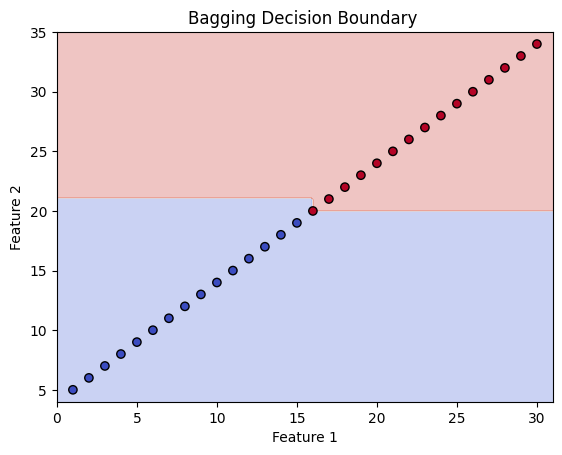

Bagging Accuracy with static data: 0.8888888888888888
Predictions on test data: [1 0 1 1 0 0 1 1 0]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ----------------------------
# 1. Simple dataset (30 rows)
# ----------------------------
data = {
    "feature1": list(range(1, 31)),
    "feature2": list(range(5, 35)),
    "label": [0]*15 + [1]*15   # Rule: label = 1 if feature1 > 15 else 0
}

df = pd.DataFrame(data)

X = df[["feature1", "feature2"]]
y = df["label"]

# ----------------------------
# 2. Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------
# 3. Bagging Classifier
# ----------------------------
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)
bag_model.fit(X_train, y_train)

# ----------------------------
# 4. Simple Decision Boundary Plot
# ----------------------------
xx, yy = np.meshgrid(
    np.linspace(X["feature1"].min()-1, X["feature1"].max()+1, 200),
    np.linspace(X["feature2"].min()-1, X["feature2"].max()+1, 200)
)

Z = bag_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X["feature1"], X["feature2"], c=y, cmap="coolwarm", edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Bagging Decision Boundary ")
plt.show()
# Evaluate accuracy
y_pred = bag_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Accuracy with static data:", accuracy)
print("Predictions on test data:", y_pred)
